In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt



In [2]:

mp_pose = mp.solutions.pose


pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)


mp_drawing = mp.solutions.drawing_utils 

TypeError: 'NoneType' object is not subscriptable

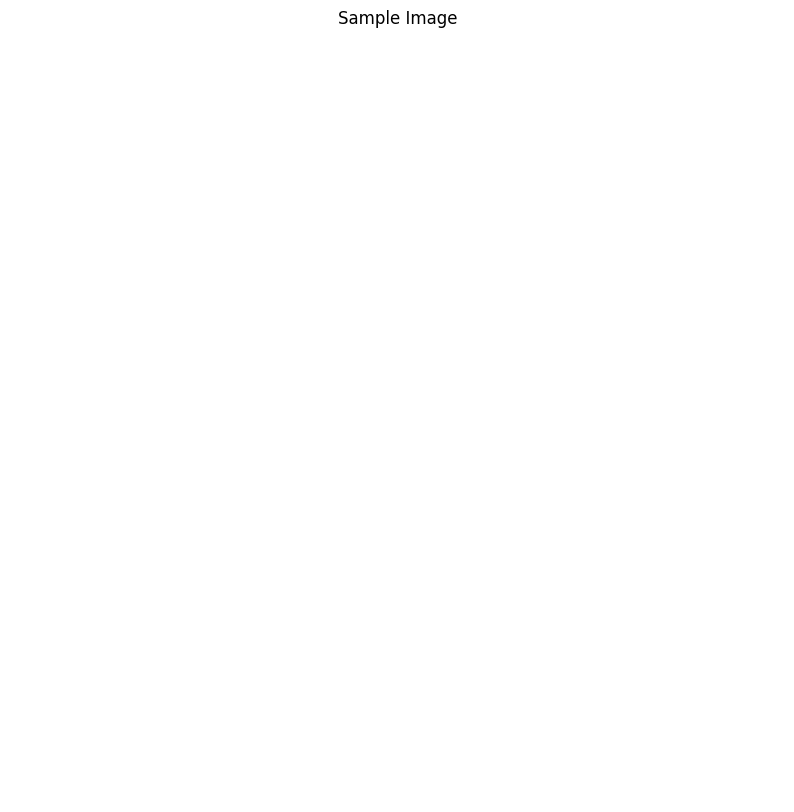

In [3]:

sample_img = cv2.imread('C:\\Users\\Hinata\\OneDrive\\Desktop\\2222.jpg')


plt.figure(figsize = [10, 10])

 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show() 

In [ ]:

results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))


if results.pose_landmarks:
    
    
    for i in range(2):
        
       
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.43360763788223267
y: 0.19849270582199097
z: -0.19008980691432953
visibility: 0.9999781847000122

LEFT_EYE_INNER:
x: 0.444265216588974
y: 0.1801394522190094
z: -0.18534532189369202
visibility: 0.999885082244873



In [ ]:

image_height, image_width, _ = sample_img.shape


if results.pose_landmarks:
    
    
    for i in range(2):
        
        
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 650.411456823349
y: 198.49270582199097
z: -285.1347103714943
visibility: 0.9999781847000122

LEFT_EYE_INNER:
x: 666.397824883461
y: 180.1394522190094
z: -278.017982840538
visibility: 0.999885082244873



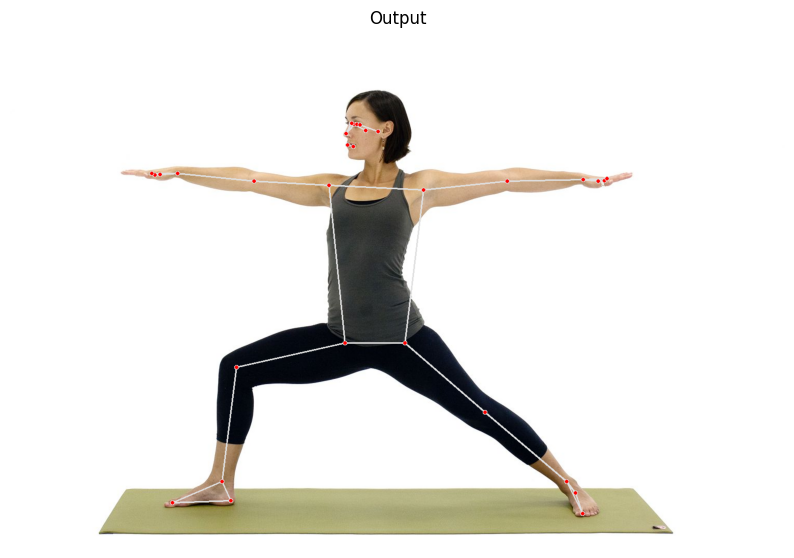

In [ ]:

img_copy = sample_img.copy()


if results.pose_landmarks:
    
   
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    
    fig = plt.figure(figsize = [10, 10])

    
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

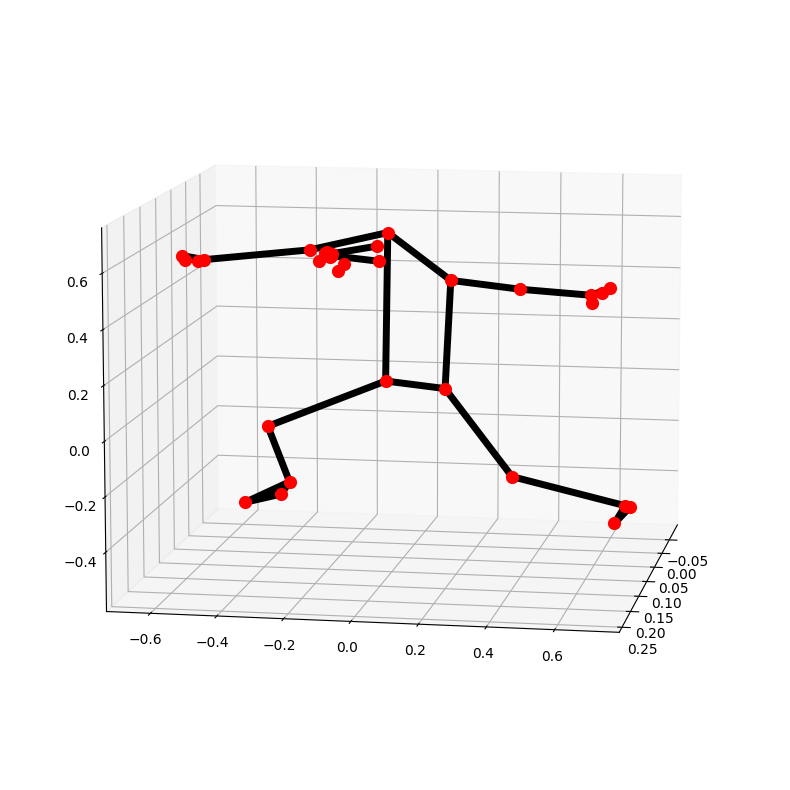

In [ ]:

mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [ ]:
def detectPose(image, pose, display=True):
    
    
    output_image = image.copy()
    
    
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
   
    results = pose.process(imageRGB)
    
    
    height, width, _ = image.shape
    
    
    landmarks = []
    
    
    if results.pose_landmarks:
    
        
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        
        for landmark in results.pose_landmarks.landmark:
            
            
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    
    if display:
    
        
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
       
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    
    else:
        
        
        return output_image, landmarks



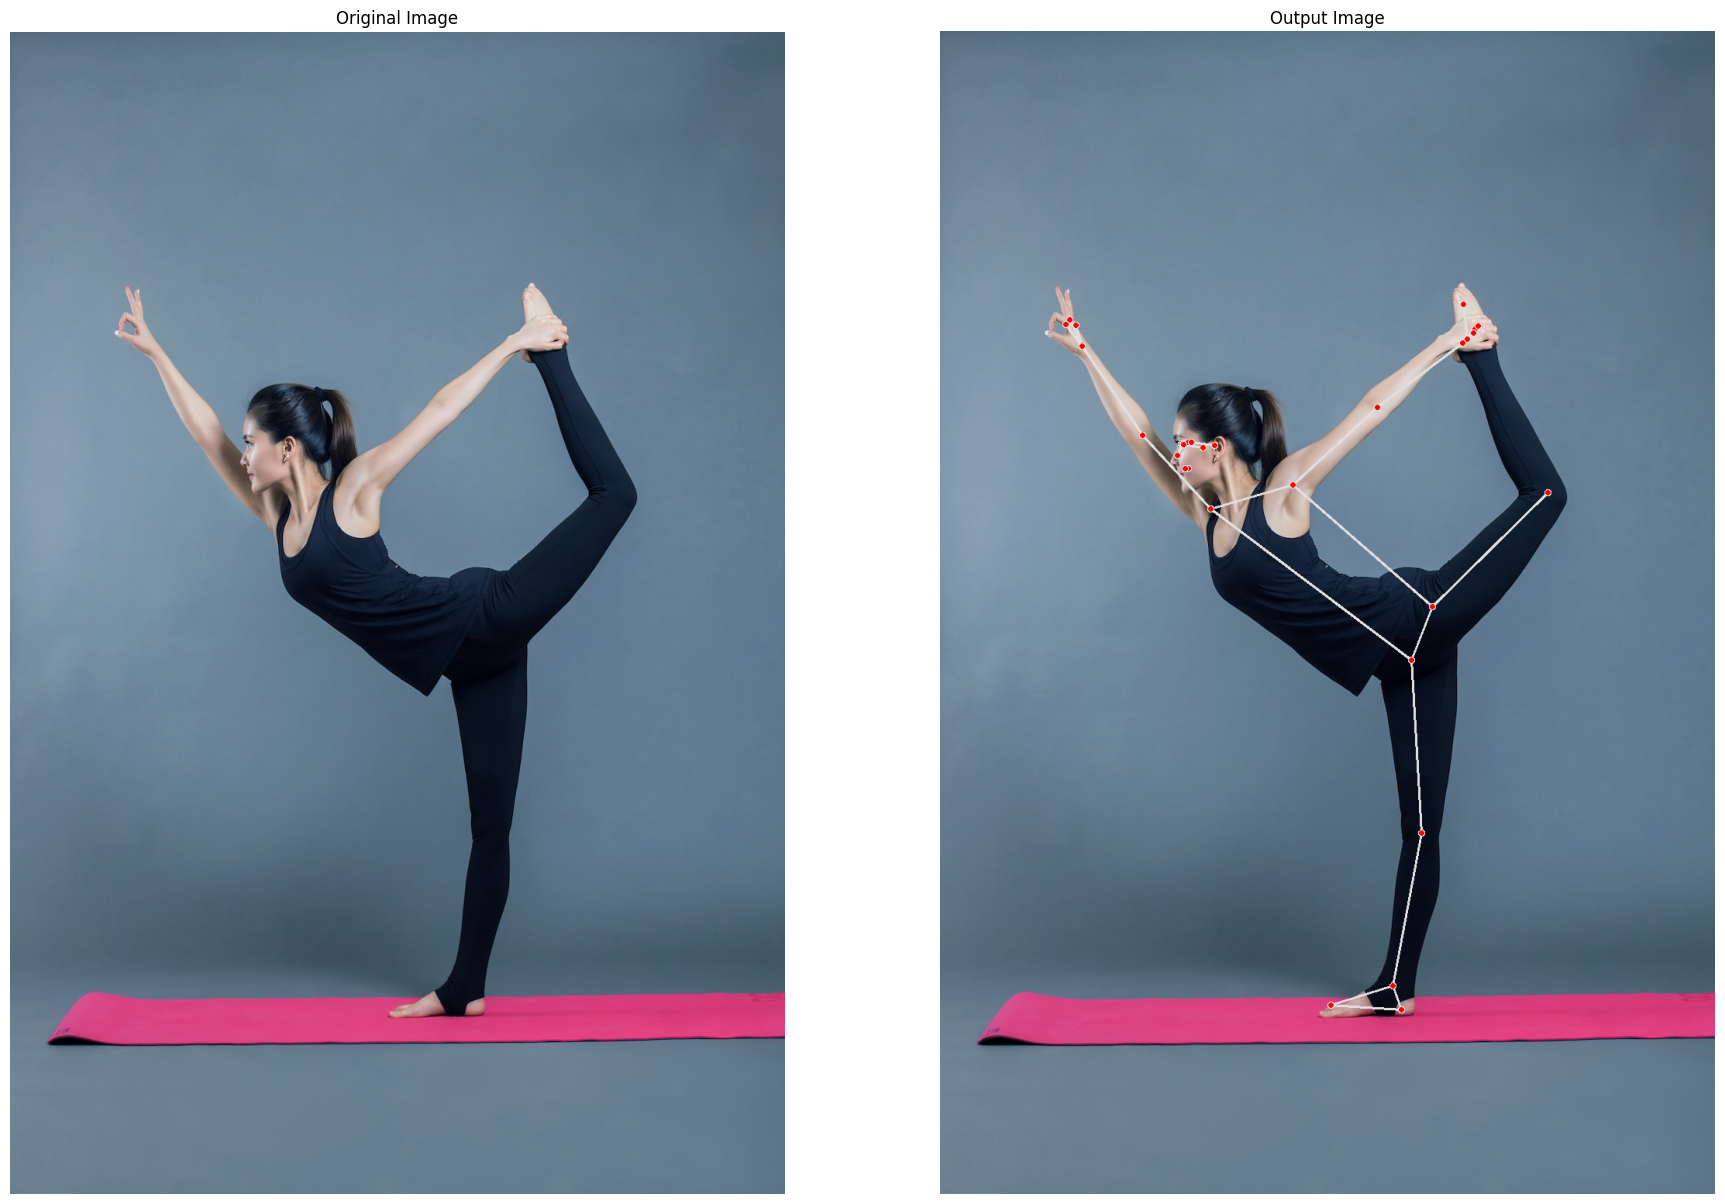

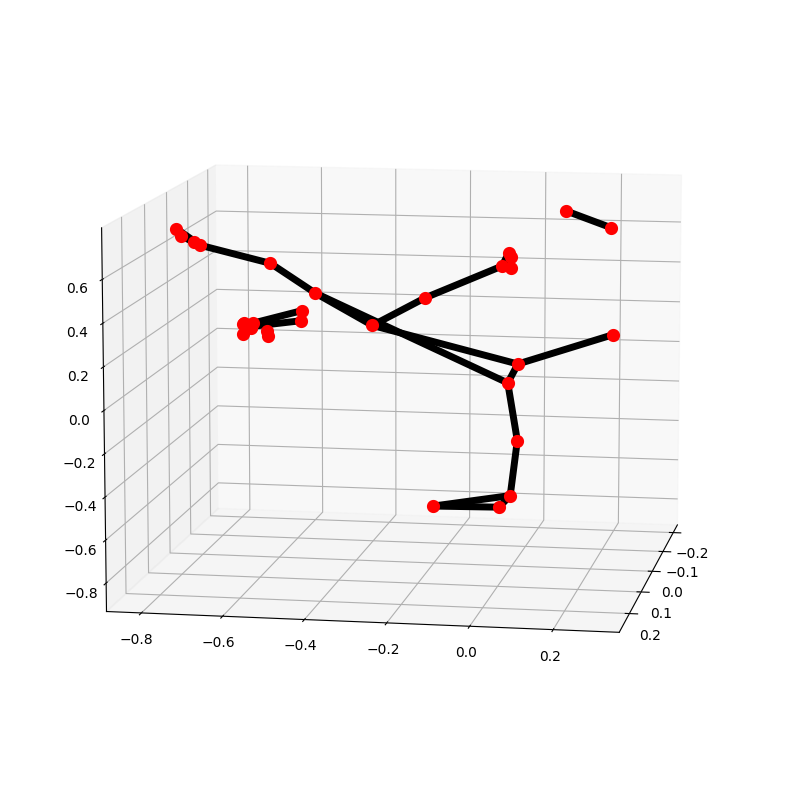

In [ ]:
image = cv2.imread('C:\\Users\\Hinata\\OneDrive\\Desktop\\555.jpg')
detectPose(image, pose , display)

    

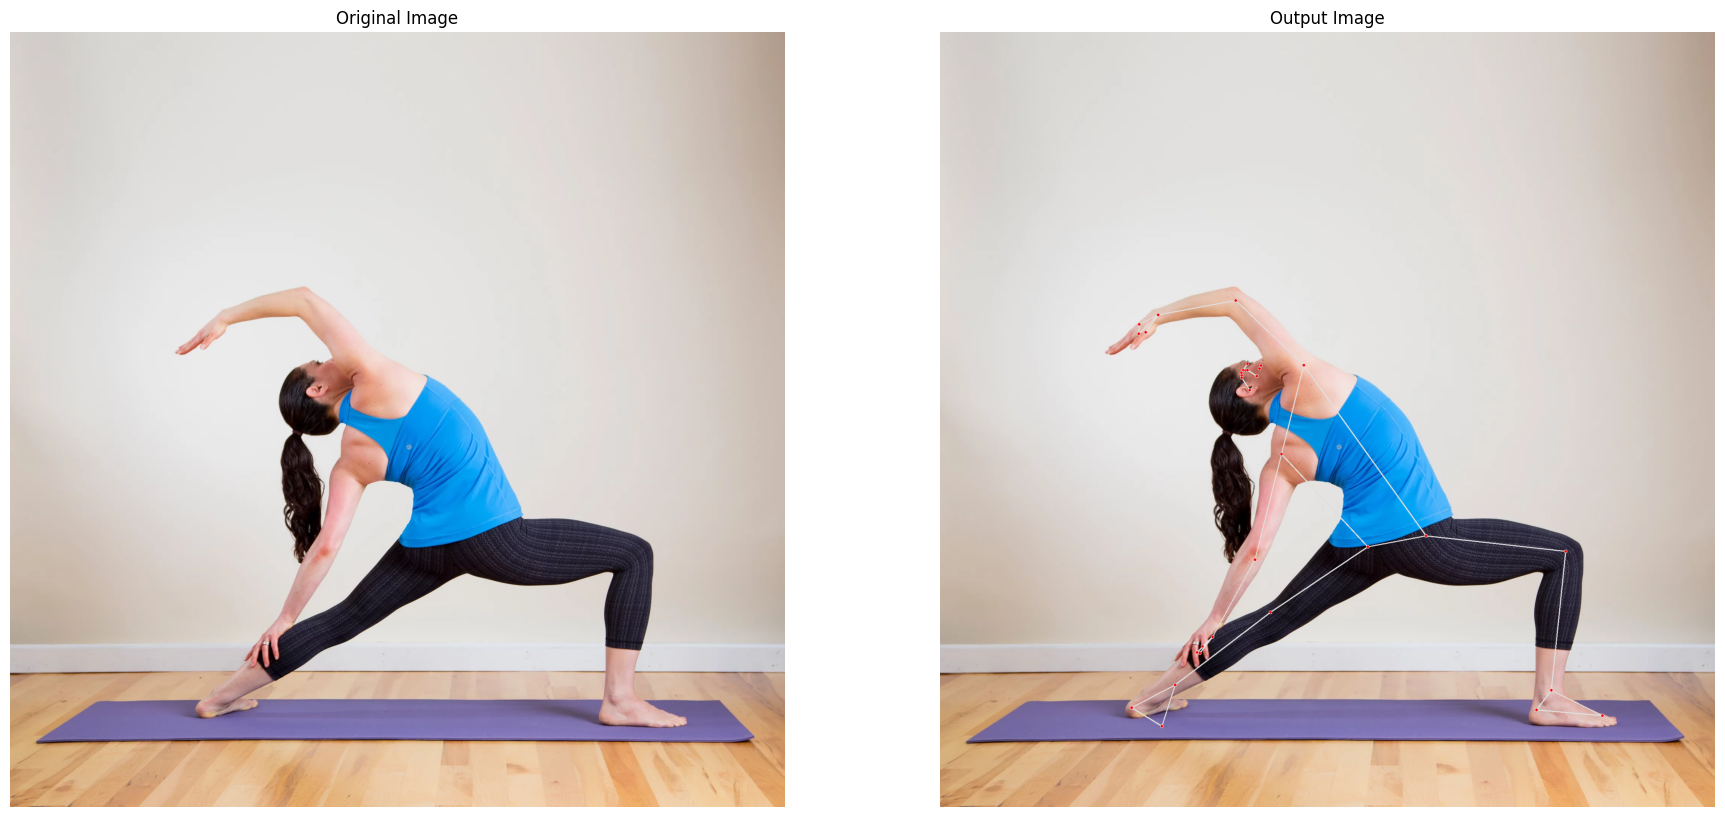

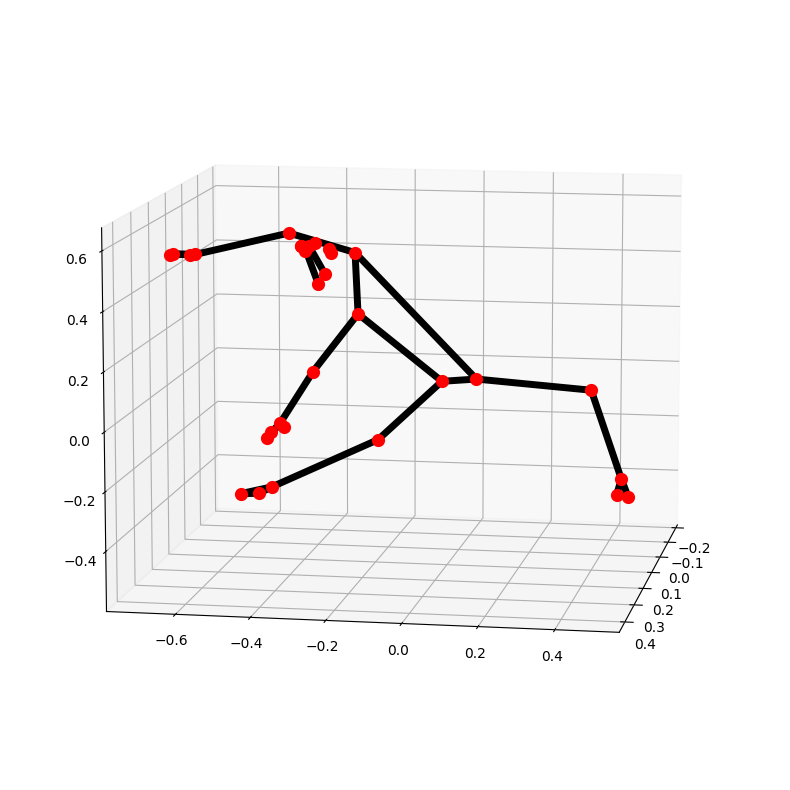

In [ ]:
image = cv2.imread('C:\\Users\\Hinata\\OneDrive\\Desktop\\3.jpg')
detectPose(image, pose , display)

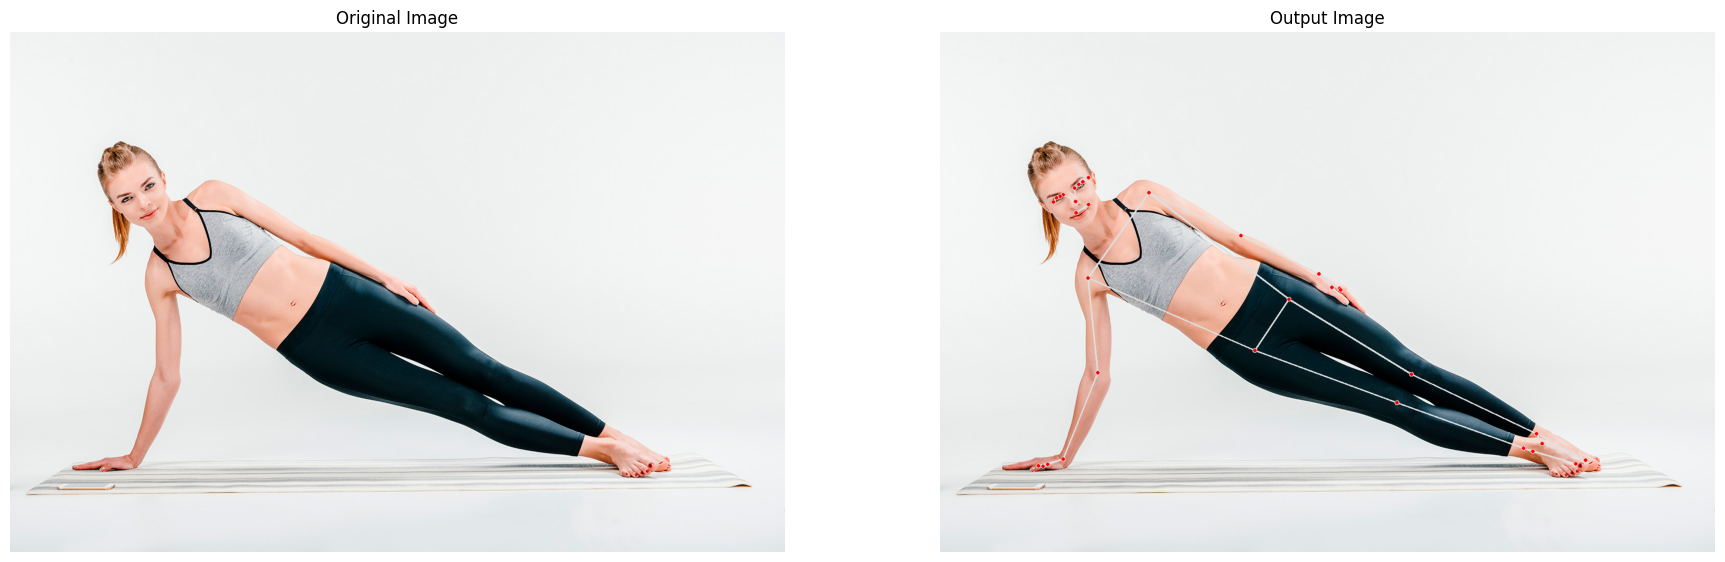

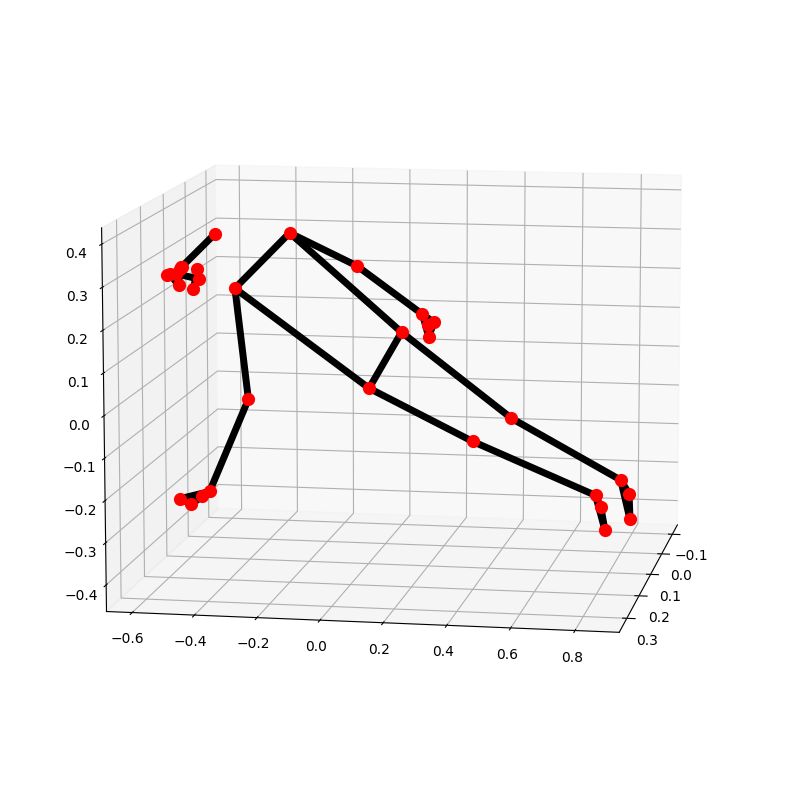

In [ ]:
image = cv2.imread('C:\\Users\\Hinata\\OneDrive\\Desktop\\4.jpg')
detectPose(image, pose , display)

    

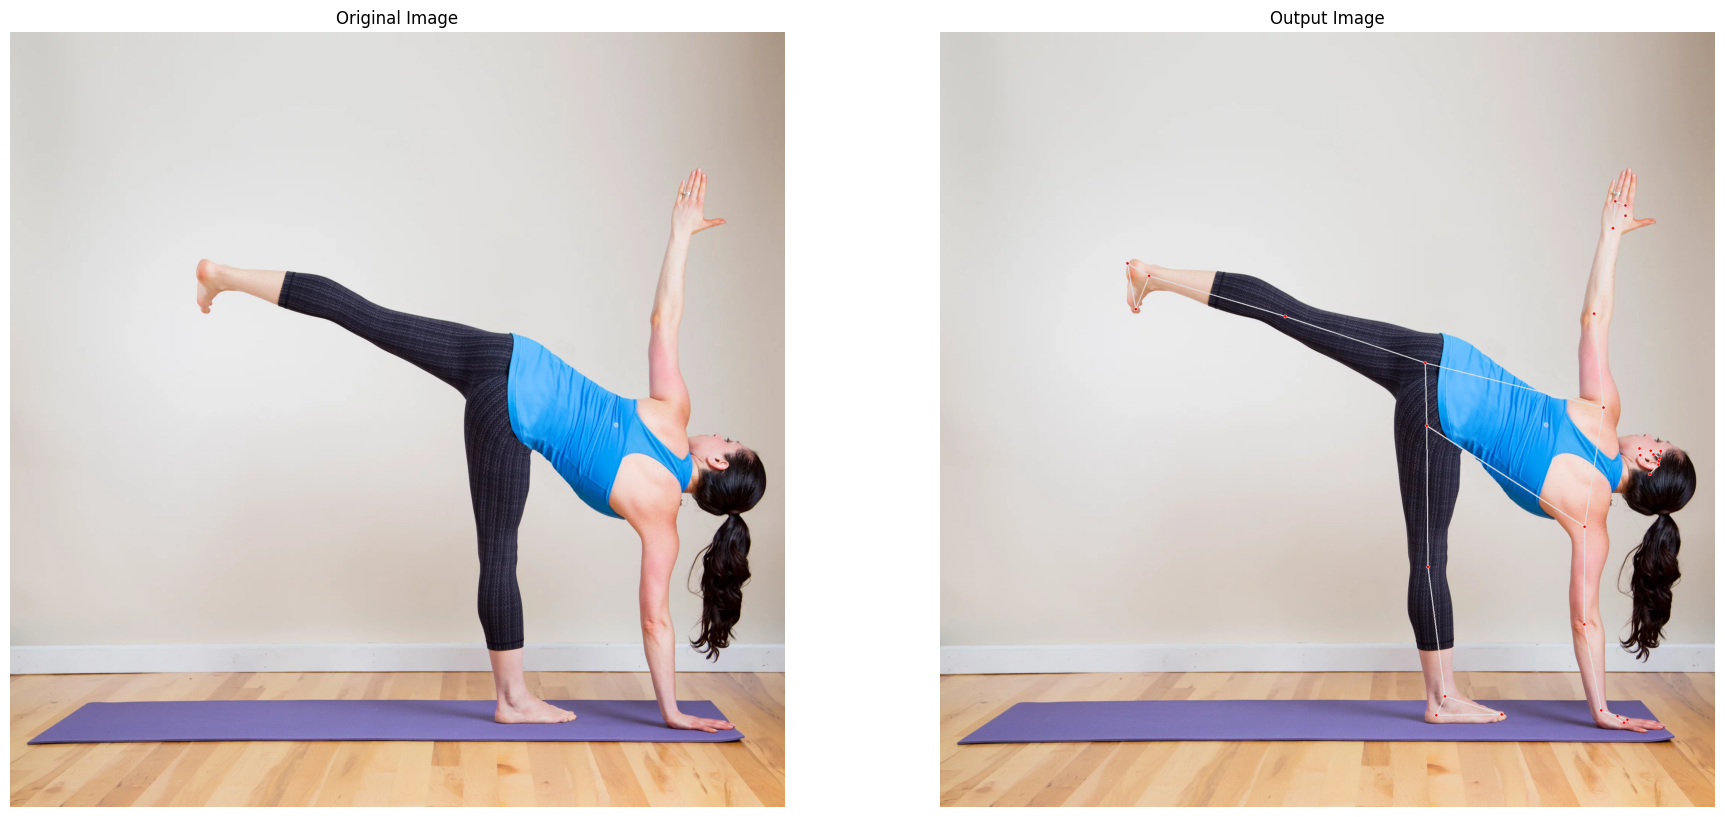

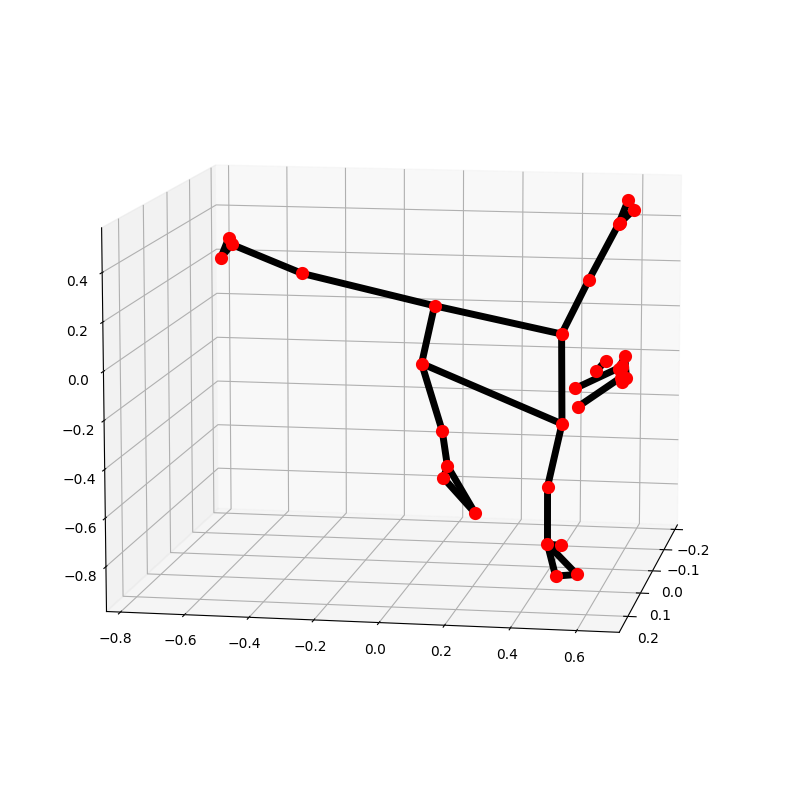

In [ ]:
image = cv2.imread('C:\\Users\\Hinata\\OneDrive\\Desktop\\6.jpg')
detectPose(image, pose , display)

    

In [ ]:

pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)


video = cv2.VideoCapture(1)


cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)





video.set(3,1280)
video.set(4,960)


time1 = 0


while video.isOpened():
    
    
    ok, frame = video.read()
    
    
    if not ok:
        
       
        break
    
    
    frame = cv2.flip(frame, 1)
    
    
    frame_height, frame_width, _ =  frame.shape
    
    
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    
    frame, _ = detectPose(frame, pose_video, display=False)
    
    
    time2 = time()
    
    
    if (time2 - time1) > 0:
    
       
        frames_per_second = 1.0 / (time2 - time1)
        
        
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    
    time1 = time2
    
    
    cv2.imshow('Pose Detection', frame)
    
   
    k = cv2.waitKey(1) & 0xFF
    
   
    if(k == 27):
        
       
        break


video.release()


cv2.destroyAllWindows()

In [ ]:
def calculateAngle(landmark1, landmark2, landmark3):
   
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

   
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    
    if angle < 0:

        
        angle += 360
    
   
    return angle

In [ ]:

angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))


print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [ ]:
def classifyPose(landmarks, output_image, display=False):
    
    
   
    label = 'Unknown Pose'

   
    color = (0, 0, 255)
    
    
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
     
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
   
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

   
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

   
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
   
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

       
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    
                    label = 'warrior pose' 
                        
   
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                
                label = 't pose'

    
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            
            label = 'tree pose'
                
    
    if label != 'Unknown Pose':
        
        
        color = (0, 255, 0)  
    
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
   
    if display:
    
       
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        
        return output_image, label

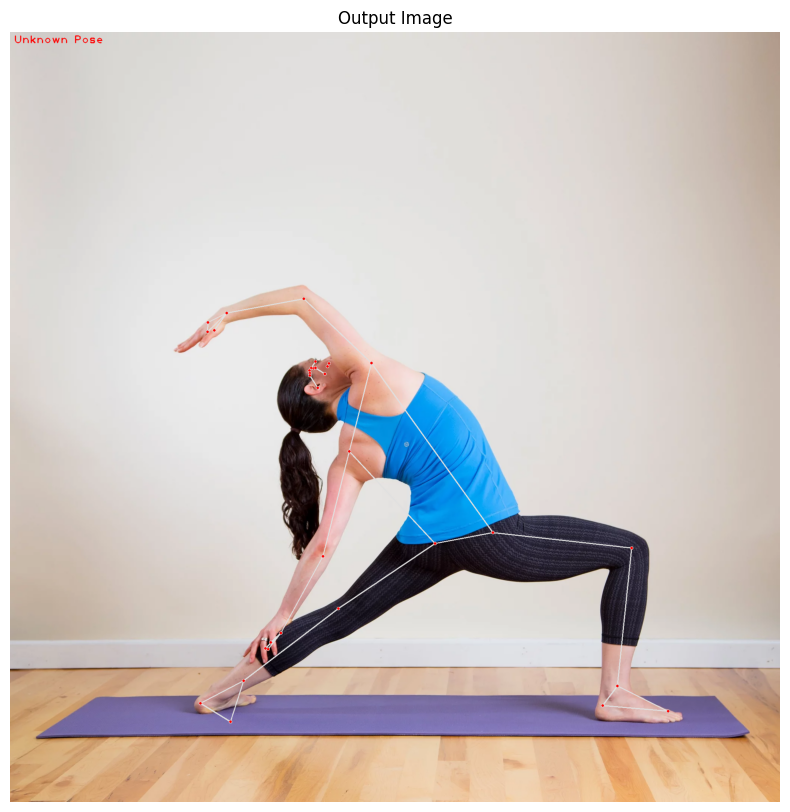

In [ ]:

image = cv2.imread('C:\\Users\\Hinata\\OneDrive\\Desktop\\3.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [4]:
from flask import Flask, json, g, request
from flask_cors import CORS

app = Flask(__name__)
CORS(app)


@app.route("/kudos", methods=["GET"])
def index():
    pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)


    camera_video = cv2.VideoCapture(0)
    camera_video.set(3,1280)
    camera_video.set(4,960)


    cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)


    while camera_video.isOpened():
        
    
        ok, frame = camera_video.read()
        
    
        if not ok:
            
            
            continue
        
        
        frame = cv2.flip(frame, 1)
        
    
        frame_height, frame_width, _ =  frame.shape
        
        
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        
        
        frame, landmarks = detectPose(frame, pose_video, display=False)
        
        
        if landmarks:
            
            
            frame, _ = classifyPose(landmarks, frame, display=False)
        
        
        cv2.imshow('Pose Classification', frame)
        
        
        k = cv2.waitKey(1) & 0xFF
        
        
        if(k == 27):
            
            break

    print("before opening camera");
    camera_video.release()
    cv2.destroyAllWindows()
    return "hello world"
if __name__ == '__main__':
      app.run(host='0.0.0.0', port=5000)






 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.57.119:5000
Press CTRL+C to quit
192.168.57.119 - - [22/Sep/2023 13:20:35] "GET / HTTP/1.1" 404 -
192.168.57.119 - - [22/Sep/2023 13:20:35] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 13:20:44] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 13:20:44] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 13:20:54] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 13:20:54] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 13:20:57] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 13:20:57] "GET /favicon.ico HTTP/1.1" 404 -
